## 🔹 GASA - Genetic Algorithm with Simulated Annealing


Số thành phố: 127
Ví dụ khoảng cách [0][1]: 21.48

=== Số người (m) = 1 ===
Tổng quãng đường: 1180.39
Tuyến dài nhất: 1180.39
Chênh lệch tuyến (Balance): 0.00
Thời gian thực thi: 33.5193 giây
Số vòng lặp để hội tụ: 21
Tốc độ hội tụ: 21.0581 đơn vị/gen
 - Tuyến 1 (1180.39): [0, 84, 83, 78, 93, 110, 75, 68, 47, 43, 29, 24, 92, 70, 15, 102, 19, 112, 87, 62, 27, 63, 4, 58, 34, 115, 121, 106, 25, 108, 35, 104, 9, 28, 109, 107, 59, 67, 39, 125, 100, 11, 53, 50, 57, 80, 61, 42, 88, 18, 46, 95, 82, 96, 5, 54, 69, 73, 52, 81, 23, 86, 91, 45, 41, 90, 3, 8, 2, 14, 12, 103, 37, 36, 13, 113, 76, 16, 71, 79, 116, 89, 30, 55, 72, 10, 21, 101, 26, 32, 31, 94, 20, 122, 114, 85, 1, 56, 38, 22, 74, 33, 98, 118, 99, 17, 7, 97, 65, 6, 120, 44, 48, 105, 117, 111, 77, 60, 64, 66, 51, 49, 123, 119, 126, 124, 40, 0]


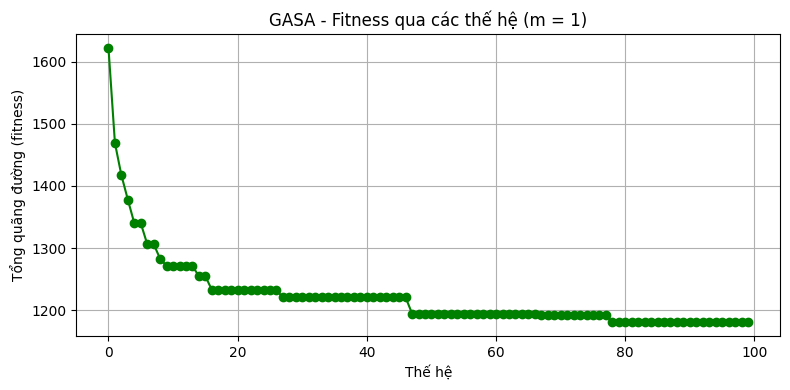


=== Số người (m) = 2 ===
Tổng quãng đường: 1511.11
Tuyến dài nhất: 791.14
Chênh lệch tuyến (Balance): 71.17
Thời gian thực thi: 37.5274 giây
Số vòng lặp để hội tụ: 10
Tốc độ hội tụ: 18.8170 đơn vị/gen
 - Tuyến 1 (791.14): [0, 82, 107, 11, 84, 45, 51, 116, 20, 23, 14, 46, 105, 115, 102, 114, 106, 117, 111, 79, 112, 77, 12, 52, 89, 33, 108, 69, 17, 66, 53, 26, 55, 4, 15, 6, 7, 19, 73, 71, 37, 91, 123, 42, 22, 2, 10, 104, 58, 16, 31, 83, 85, 76, 63, 35, 67, 8, 92, 38, 124, 126, 103, 41, 0]
 - Tuyến 2 (719.97): [0, 40, 39, 56, 49, 60, 24, 110, 122, 80, 68, 62, 57, 87, 94, 100, 90, 70, 72, 81, 88, 44, 50, 47, 9, 96, 93, 118, 32, 65, 120, 78, 43, 3, 34, 61, 30, 101, 18, 5, 121, 28, 36, 54, 75, 99, 29, 125, 113, 98, 13, 95, 27, 48, 21, 64, 86, 97, 25, 74, 119, 1, 59, 109, 0]


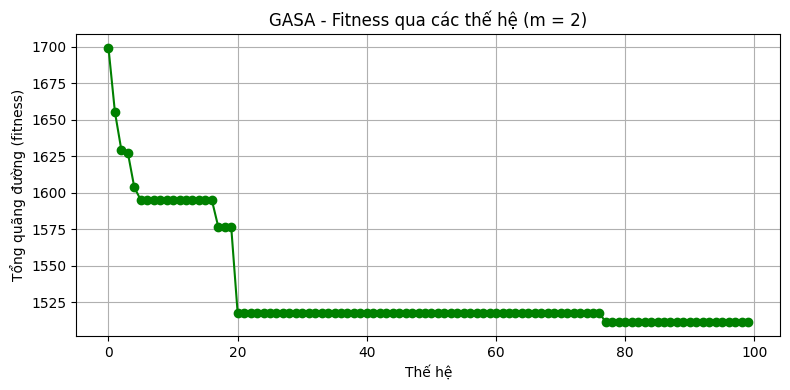


=== Số người (m) = 3 ===
Tổng quãng đường: 1622.56
Tuyến dài nhất: 580.49
Chênh lệch tuyến (Balance): 63.17
Thời gian thực thi: 42.1941 giây
Số vòng lặp để hội tụ: 9
Tốc độ hội tụ: 7.7922 đơn vị/gen
 - Tuyến 1 (517.32): [0, 95, 119, 37, 92, 14, 25, 34, 5, 91, 7, 55, 28, 96, 72, 124, 50, 65, 12, 125, 43, 62, 67, 105, 79, 6, 64, 88, 31, 45, 63, 70, 86, 1, 20, 76, 74, 4, 2, 35, 68, 22, 109, 0]
 - Tuyến 2 (580.49): [0, 40, 126, 39, 80, 89, 103, 112, 77, 106, 3, 58, 85, 16, 8, 27, 116, 123, 113, 51, 11, 114, 42, 48, 61, 71, 24, 108, 29, 99, 98, 59, 54, 101, 53, 83, 111, 110, 56, 36, 102, 107, 90, 0]
 - Tuyến 3 (524.75): [0, 32, 121, 19, 97, 75, 94, 120, 47, 9, 57, 60, 93, 23, 78, 17, 87, 21, 122, 18, 15, 104, 46, 118, 52, 69, 100, 117, 115, 49, 44, 41, 10, 73, 66, 82, 30, 26, 13, 33, 81, 38, 84, 0]


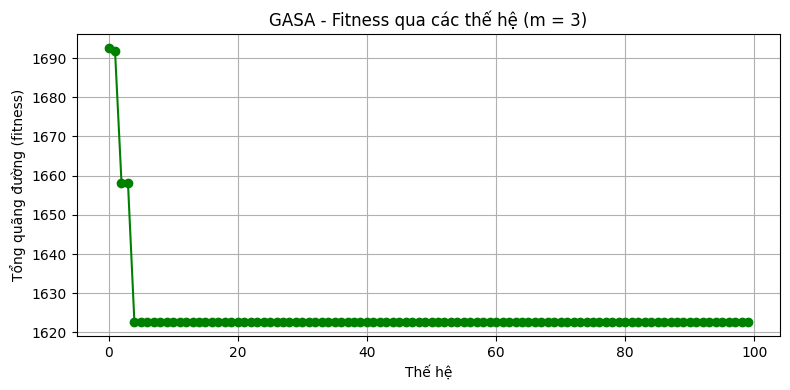

In [ ]:
import sys
sys.path.append(".../src")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import random
from GA import run_gasa
distance_df = pd.read_csv(".../HN_distance_matrix.csv", index_col=0) 
distance_matrix = distance_df.values
num_cities = distance_matrix.shape[0]

print("Số thành phố:", num_cities)
print("Ví dụ khoảng cách [0][1]:", distance_matrix[0][1])
def run_gasa_custom(distance_matrix, num_salesmen = 3, generations = 100, pop_size = 50):
    depot = 0
    temp_init = 100
    temp_final = 1
    alpha = 0.95
    mutation_rate = 0.1
    def decode(chrom):
        routes = [[] for _ in range(num_salesmen)]
        current = 0
        for city in chrom:
            routes[current].append(city)
            current = (current + 1) % num_salesmen
        return routes
    def total_distance(solution):
        total = 0
        for route in solution:
            full = [depot] + route + [depot]
            for i in range(len(full) - 1):
                total += distance_matrix[full[i]][full[i + 1]]
        return total
    def ox(p1,p2):
        start, end = sorted(np.random.choice(range(len(p1)), 2))
        child = [None] * len(p1)
        child[start:end] = p1[start:end]
        ptr = 0
        for city in p2:
            if city not in child:
                while ptr < len(child) and child[ptr] is not None:
                    ptr += 1
                if ptr < len(child):
                   child[ptr] = city
        return child
    def mutate(chrom):
        if random.random() < mutation_rate:
            i, j = random.sample(range(len(chrom)), 2)
            chrom[i], chrom[j] = chrom[j], chrom[i]
        return chrom
    def sa(routes):
        def rd(routes):
            full = [depot] + routes + [depot]
            return sum(distance_matrix[full[i]][full[i + 1]] for i in range(len(full) - 1))
        result = []
        for route in routes:
            if len(route) < 2:
                result.append(route)
                continue
            current = route.copy()
            cost = rd(current)
            t = temp_init
            while t > temp_final:
                if len(current) < 1:
                    break
                i,j = sorted(random.sample(range(len(current)), 2))
                neighbor = current.copy()
                neighbor[i:j+1] = reversed(neighbor[i:j+1])
                delta = rd(neighbor) - cost
                if delta < 0 or np.exp(-delta/t) > random.random():
                    current = neighbor
                    cost = rd(neighbor)  
                t *= alpha
            result.append(current)
        return result
    cities = list(range(1, num_cities))  # Exclude depot
    population = [random.sample(cities, len(cities)) for _ in range(pop_size)]
    best_solution = decode(population[0])
    best_cost = total_distance(best_solution)
    fitness_per_generation = []

    for gen in range(generations):
        scored = [(chrom, total_distance(decode(chrom))) for chrom in population]
        scored.sort(key=lambda x: x[1])
        new_population = [s[0] for s in scored[:10]]

        while len(new_population) < pop_size:
            p1, p2 = random.choices([s[0] for s in scored[:25]], k=2)
            child = ox(p1, p2)
            child = mutate(child)
            improved = sa(decode(child))
            flat = [city for route in improved for city in route]
            new_population.append(flat)

        population = new_population
        current_solution = decode(population[0])
        current_cost = total_distance(current_solution)
        fitness_per_generation.append(current_cost)

        if current_cost < best_cost:
            best_solution = current_solution
            best_cost = current_cost

    return best_solution, best_cost, fitness_per_generation

# === Detect convergence ===
def detect_convergence(generation_fitness, tolerance=1e-3, window=5):
    for i in range(len(generation_fitness) - window):
        window_values = generation_fitness[i:i+window]
        if max(window_values) - min(window_values) < tolerance:
            return i + window
    return len(generation_fitness)

# === RUN GASA ===
for m in range(1, 4):
    print(f"\n=== Số người (m) = {m} ===")
    start_time = time.time()
    routes, total_distance, fitness_per_generation = run_gasa_custom(distance_matrix, num_salesmen= m)
    end_time = time.time()

    exec_time = end_time - start_time

    # Tính độ dài từng tuyến để đánh giá
    route_distances = [
        sum(distance_matrix[r[i]][r[i+1]] for i in range(len(r)-1))
        for r in [[0] + r + [0] for r in routes]
    ]
    max_len = max(route_distances)
    min_len = min(route_distances)
    balance_metric = max_len - min_len

    converged_gen = detect_convergence(fitness_per_generation)
    convergence_speed = (fitness_per_generation[0] - fitness_per_generation[-1]) / converged_gen if converged_gen else 0

    print(f"Tổng quãng đường: {total_distance:.2f}")
    print(f"Tuyến dài nhất: {max_len:.2f}")
    print(f"Chênh lệch tuyến (Balance): {balance_metric:.2f}")
    print(f"Thời gian thực thi: {exec_time:.4f} giây")
    print(f"Số vòng lặp để hội tụ: {converged_gen}")
    print(f"Tốc độ hội tụ: {convergence_speed:.4f} đơn vị/gen")

    for i, r in enumerate(routes):
        print(f" - Tuyến {i+1} ({route_distances[i]:.2f}): {[0] + r + [0]}")

    plt.figure(figsize=(8, 4))
    plt.plot(fitness_per_generation, marker='o', linestyle='-', color='green')
    plt.title(f"GASA - Fitness qua các thế hệ (m = {m})")
    plt.xlabel(f"Thế hệ")
    plt.ylabel(f"Tổng quãng đường (fitness)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()